In [108]:
import os
import re
import glob
import json
import numpy as np
import datetime
import logging
import haversine
import matplotlib.pyplot as plt
from collections import Counter
from liegecolloquium import Participant
from importlib import reload

In [98]:
datadir = "../data/coords/"
datafilelist = sorted(glob.glob(os.path.join(datadir, "ParticipantList-*.coord")))
lat0, lon0 = 50.5830803, 5.559063999999999

In [96]:
def read_coords(coordfile):
    """
    Read the coordinates from a file similar to:
    var coords = [
      [38.9538529, -95.2631378617998],
      [50.64080705, 5.57643469040658],
      ...
      [41.53373995, -70.6490705712619],
    ]
    """
    if os.path.exists(coordfile):
        with open(coordfile, "r") as df:
            t = df.read()
        coordstring = re.findall(r'\[([-+]?\d*\.\d+), ([-+]?\d*\.\d+)\]', t)
        lat = [float(cc[0]) for cc in coordstring]
        lon = [float(cc[1]) for cc in coordstring]
    else:
        lon, lat = None, None

    return lon, lat

In [147]:
def get_CO2_a(dist):
    """
    Compute the quality of CO2 emitted, according to the distance traveled
    """
    CO2 = dist * 250.
    
    return CO2
    
def get_CO2_b(dist):
    # Can also consider that for longer flights, the emission is lower?
    if dist > 3000:
        CO2 = dist * 115.
    else:
        CO2 = dist * 101.
        
    return CO2

In [148]:
distancelist = []
yearlist = []
CO2list = []
meandist = []
for datafile in datafilelist:
    lon, lat = read_coords(datafile)
    m = re.search(r"ParticipantList-(\d{4}).coord", os.path.basename(datafile))
    yearlist.append(int(m.group(1)))
    
    distyear = []
    CO2year = 0.0
    for llon, llat in zip(lon, lat):
        dist = haversine.haversine((lat0, lon0), (llat, llon))
        distyear.append(dist)
        CO2 = get_CO2_a(dist)
        CO2year += CO2
    
    
    CO2list.append(CO2year)
    distyear = np.array(distyear)
    distancelist.append(distyear.sum())
    meandist.append(distyear.mean())

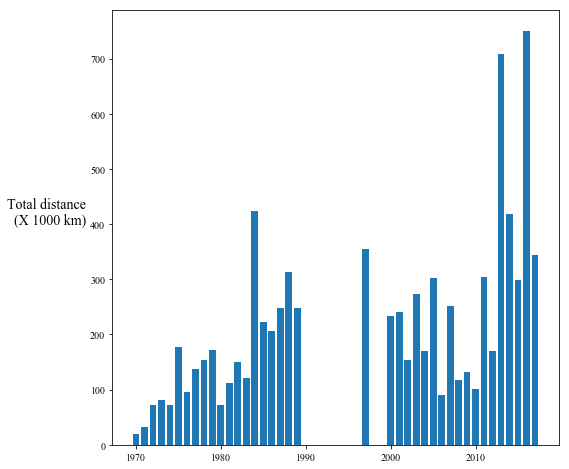

In [138]:
fig = plt.figure(figsize=(8, 8))
plt.bar(yearlist, np.array(distancelist) / 1000.)
plt.ylabel("Total distance\n(X 1000 km)", rotation=0, ha="right", fontsize=14)
plt.show()

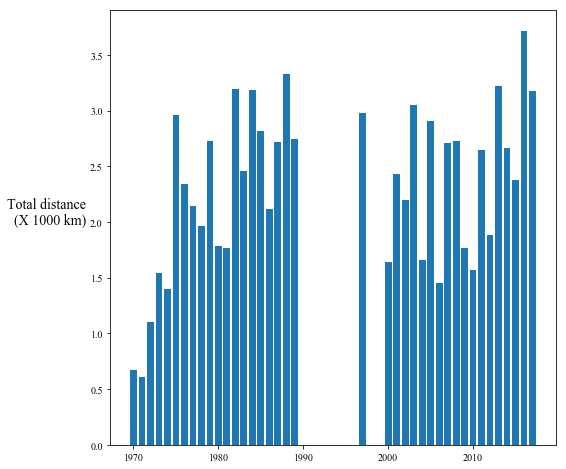

In [150]:
fig = plt.figure(figsize=(8, 8))
plt.bar(yearlist, np.array(meandist) / 1000.)
plt.ylabel("Total distance\n(X 1000 km)", rotation=0, ha="right", fontsize=14)
plt.show()